In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import random
random.seed(42)
%matplotlib inline

In [2]:
#Rewards in Cliff World
def stride(state,action):
    i,j = state
    if action == up:
        next_state = [max(i-1,0),j]
    elif action == left:
        next_state = [i,max(j-1,0)]
    elif action == right:
        next_state = [i,min(j+1,width-1)]
    elif action == down:
        next_state = [min(i+1,height-1),j]
    else:
        assert False
    reward = -1
    if (action == down and i == 3 and 1 <= j <= 14) or (action == right and state == start_point):
        reward = -100
        next_state = start_point
    return next_state, reward

# #Selction action based on state and q_value
def choose_action(state, q_value):
    if np.random.binomial(1, eps) == 1:
        return np.random.choice(actions)
    else:
        values_ = q_value[state[0], state[1], :]
        return np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

In [3]:
# SARSA
alpha = 0.4 
def sarsa(q_value, expected=False, step_size=alpha):
    state = start_point
    action = choose_action(state, q_value)
#     if np.random.binomial(1, eps) == 1:
#         action = np.random.choice(actions)
#     else:
#         values_ = q_value[state[0], state[1], :]
#         action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])
    rewards = 0.0
    while state != end_point:
        next_state, reward = stride(state, action)
#         i,j = state
#         if action == up:
#             next_state = [max(i-1,0),j]
#         elif action == left:
#             next_state = [i,max(j-1,0)]
#         elif action == right:
#             next_state = [i,min(j+1,width-1)]
#         elif action == down:
#             next_state = [min(i+1,height-1),j]
#         else:
#             assert False
#         reward = -1
#         if (action == down and i == 3 and 1 <= j <= 14) or (action == right and state == start_point):
#             reward = -100
#             next_state = start_point
        next_action = choose_action(next_state, q_value)
#         if np.random.binomial(1, eps) == 1:
#             next_action = np.random.choice(actions)
#         else:
#             values_ = q_value[state[0], state[1], :]
#             next_action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])
        rewards += reward
        if not expected:
            target = q_value[next_state[0], next_state[1], next_action]
        else:
            # calculate the expected value of new state
            target = 0.0
            q_next = q_value[next_state[0], next_state[1], :]
            best_actions = np.argwhere(q_next == np.max(q_next))
            for a in actions:
                if a in best_actions:
                    target += ((1.0 - eps) / len(best_actions) + eps / len(actions)) * q_value[next_state[0], next_state[1], action_]
                else:
                    target += eps / len(actions) * q_value[next_state[0], next_state[1], action_]
        target *= gamma
        q_value[state[0], state[1], action] += step_size * (
                reward + target - q_value[state[0], state[1], action])
        state = next_state
        action = next_action
    return rewards

In [4]:
# Q-Learning
def q_learning(q_value, step_size=alpha):
    state = start_point
    rewards = 0.0
    while state != end_point:
        action = choose_action(state, q_value)
#         if np.random.binomial(1, eps) == 1:
#             action = np.random.choice(actions)
#         else:
#             values_ = q_value[state[0], state[1], :]
#             action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])
        next_state, reward = stride(state, action)
#         i,j = state
#         if action == up:
#             next_state = [max(i-1,0),j]
#         elif action == left:
#             next_state = [i,max(j-1,0)]
#         elif action == right:
#             next_state = [i,min(j+1,width-1)]
#         elif action == down:
#             next_state = [min(i+1,height-1),j]
#         else:
#             assert False
#         reward = -1
#         if (action == down and i == 3 and 1 <= j <= 14) or (action == right and state == start_point):
#             reward = -100
#             next_state = start_point
        rewards += reward
        # Q-Learning update
        q_value[state[0], state[1], action] += step_size * (
                reward + gamma * np.max(q_value[next_state[0], next_state[1], :]) -
                q_value[state[0], state[1], action])
        state = next_state
    return rewards

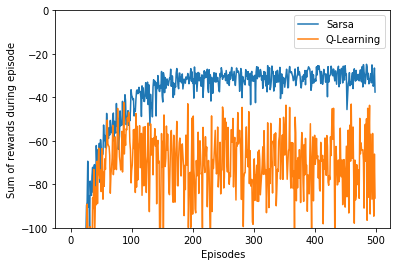

In [5]:
height = 5 # height of a cliff world
width = 16 # width of a cliff world
eps = 0.1 # epsilon
alpha = 0.4 
gamma = 1 # No discounting
up = 0 # up action
down = 1 # down action
left = 2 # left action
right = 3 # right action
actions = [up,down,left,right]
start_point = [4,0] # starting state of a simulation
end_point = [4,15] # Ending state of simulation
episodes = 500
runs = 50
rewards_sarsa = np.zeros(episodes)
rewards_q_learning = np.zeros(episodes)
for r in range(runs):
    q_sarsa = np.zeros((height, width, 4))
    q_q_learning = np.copy(q_sarsa)
    for i in range(0, episodes):
        rewards_sarsa[i] += sarsa(q_sarsa)
        rewards_q_learning[i] += q_learning(q_q_learning)
# averaging over independt runs
rewards_sarsa /= runs
rewards_q_learning /= runs
 # draw reward curves
plt.plot(rewards_sarsa, label='Sarsa')
plt.plot(rewards_q_learning, label='Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Sum of rewards during episode')
plt.ylim([-100, 0])
plt.legend()
plt.savefig('SARSA_Q.png')
plt.show()